In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk, spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
movies_df = pd.read_csv('../data/cleaned_movies.csv')
movies_df.head()

,Title,Overview,Tagline,Homepage,Release_Date,Vote_Average,Runtime,Poster_Path,Genres,Keywords,Director,budget,revenue,production_companies,Cast
0,Inception,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,https://www.warnerbros.com/movies/inception,2010-07-15,8.364,148,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"Action, Science Fiction, Adventure","[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",Christopher Nolan,160000000,825532764,"Legendary Pictures, Warner Bros., Syncopy","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen..."
1,Interstellar,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,http://www.interstellarmovie.net/,2014-11-05,8.417,169,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"Adventure, Drama, Science Fiction","[{""id"": 83, ""name"": ""saving the world""}, {""id""...",Christopher Nolan,165000000,675120017,"Paramount Pictures, Legendary Pictures, Warner...","Matthew McConaughey, Jessica Chastain, Anne Ha..."
2,The Dark Knight,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,https://www.warnerbros.com/movies/dark-knight/,2008-07-16,8.512,152,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"Drama, Action, Crime, Thriller","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Christopher Nolan,185000000,1004558444,"DC Comics, Legendary Pictures, Warner Bros., D...","Christian Bale, Heath Ledger, Aaron Eckhart"
3,Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,https://www.avatar.com/movies/avatar,2009-12-15,7.573,162,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Action, Adventure, Fantasy, Science Fiction","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",James Cameron,237000000,2787965087,"Ingenious Film Partners, Twentieth Century Fox...","Sam Worthington, Zoe Saldana, Sigourney Weaver"
4,The Avengers,When an unexpected enemy emerges and threatens...,Some assembly required.,https://www.marvel.com/movies/the-avengers,2012-04-25,7.710,143,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"Science Fiction, Action, Adventure","[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",Joss Whedon,220000000,1519557910,"Paramount Pictures, Marvel Studios","Robert Downey Jr., Chris Evans, Mark Ruffalo"


In [36]:
# 1. Aperçu général
print("Dimensions :", movies_df.shape)
print("\nColonnes :", movies_df.columns)
print("\nTypes de données :\n", movies_df.dtypes)

Dimensions : (4771, 15)

Colonnes : Index(['Title', 'Overview', 'Tagline', 'Homepage', 'Release_Date',
       'Vote_Average', 'Runtime', 'Poster_Path', 'Genres', 'Keywords',
       'Director', 'budget', 'revenue', 'production_companies', 'Cast'],
      dtype='object')

Types de données :
 Title                    object
Overview                 object
Tagline                  object
Homepage                 object
Release_Date             object
Vote_Average            float64
Runtime                   int64
Poster_Path              object
Genres                   object
Keywords                 object
Director                 object
budget                    int64
revenue                   int64
production_companies     object
Cast                     object
dtype: object


In [37]:
# 3. Statistiques descriptives pour les colonnes numériques
print("\nStatistiques numériques :")
print(movies_df.describe())


Statistiques numériques :
       Vote_Average      Runtime        budget       revenue
count   4771.000000  4771.000000  4.771000e+03  4.771000e+03
mean       6.321060   107.573674  2.923619e+07  8.280760e+07
std        0.964157    20.845377  4.079101e+07  1.632646e+08
min        0.000000     0.000000  0.000000e+00  0.000000e+00
25%        5.821000    94.000000  9.500000e+05  0.000000e+00
50%        6.392000   104.000000  1.500000e+07  1.947811e+07
75%        6.940500   118.000000  4.000000e+07  9.365850e+07
max       10.000000   339.000000  3.800000e+08  2.787965e+09


In [38]:
# 4. Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(movies_df.isnull().sum())


Valeurs manquantes par colonne :
Title                   0
Overview                0
Tagline                 0
Homepage                0
Release_Date            0
Vote_Average            0
Runtime                 0
Poster_Path             0
Genres                  0
Keywords                0
Director                0
budget                  0
revenue                 0
production_companies    0
Cast                    0
dtype: int64



Top 10 genres les plus fréquents :
Genres
Drama                     323
Comedy                    240
Drama, Romance            167
Comedy, Romance           166
Comedy, Drama             143
Comedy, Drama, Romance    106
Horror, Thriller           71
Documentary                63
Horror                     62
Drama, Thriller            58
Name: count, dtype: int64


<Axes: xlabel='Genres'>

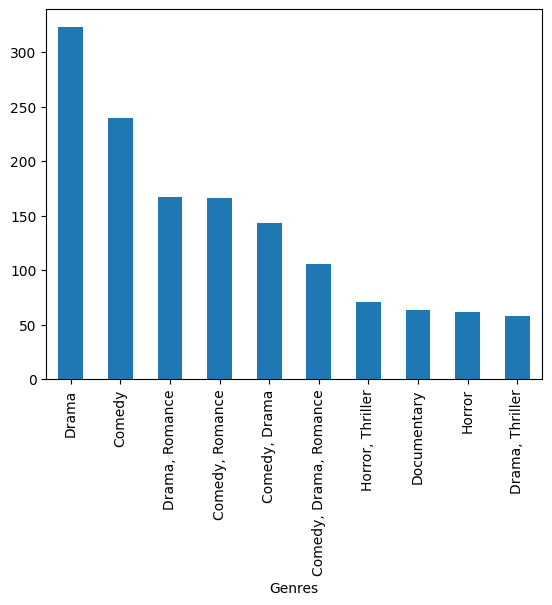

In [43]:
# 5. Distribution des genres
print("\nTop 10 genres les plus fréquents :")
print(movies_df['Genres'].value_counts().head(10))
movies_df['Genres'].value_counts().head(10).plot(kind='bar')
